In [1]:
#Import module
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
import scipy.optimize as optimization  
import pandas as pd
#Latex font
import matplotlib as mpl
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=16)

In [2]:
ls

2022_Feb_week4_Weighted_mean_calculation_This_work_combined.out
DP_Leo_LTT_fit_weighted_data_Thiswork_K.ipynb
DP_Leo_LTT_fit_weighted_data_Thiswork_K_Res.jpg
DP_Leo_LTT_fit_weighted_data_Thiswork_Res.jpg
DP_Leo_LTT_fit_weighted_data_Thiswork_b.ipynb
DP_Leo_LTT_fit_weighted_data_Thiswork_b_Res.jpg
DP_Leo_LTT_fit_weighted_data_Thiswork_e.ipynb
DP_Leo_LTT_fit_weighted_data_Thiswork_e_Res.jpg
DP_Leo_LTT_fit_weighted_data_Thiswork_interporate.out
DP_Leo_LTT_fit_weighted_data_Thiswork_interporate_K100.out
DP_Leo_LTT_fit_weighted_data_Thiswork_w.ipynb
DP_Leo_LTT_fit_weighted_data_Thiswork_w_Res.jpg


In [3]:
#Read data ---#1
Input = "2022_Feb_week4_Weighted_mean_calculation_This_work_combined.out"
Data   = np.genfromtxt(Input)

BJD_time = Data[:,0]
OC = Data[:,1]
OC_err = Data[:,2]

In [4]:
#t = T0_bjd + P0_day*Epoch
x = BJD_time
y = OC
dy = OC_err

len_x = len(x)
#print(len_x)
#print(x)

In [5]:
m = 0
c = 0
K = 33.7        #m/s
e = 0               #No-unit
b = 0.0005
w = -1.36     #rad

In [6]:
def LTT_fit(x,m,c,K,e,b,w):
    return m*x + c + K*(1 - e*e)*np.sin(b*x - w)/(1 + e*np.cos(b*x))

In [7]:
import scipy.optimize as optimization  
guess = (m,c,K,e,b,w)
#guess = [41.9455, 0.39, 0.0005, -1.36]
params, params_covariance = optimization.curve_fit(LTT_fit, x, y,sigma=dy, absolute_sigma=True,p0=guess)

In [8]:
m = params[0]
c = params[1]
K = params[2]
e = params[3]
b = params[4]
w = params[5]

dm = params_covariance[0,0]
dc = params_covariance[1,1]
dK = params_covariance[2,2]
de = params_covariance[3,3]
db = params_covariance[4,4]
dw = params_covariance[5,5]

ocfit = LTT_fit(x,*params)

if e<0:
    w -= np.pi
    e *= -1
    w_deg = w*180/np.pi

In [9]:
print("The Keplerian parameters (w = -1.36 s):")
print("m =", m, "+/-", dm**0.5, "[s]")
print("c =", c, "+/-", dc**0.5, "[s]")
print("K =", K, "+/-", dK**0.5, "[s]")
print("e =", e, "+/-", de**0.5, "[days]")
print("b =", b, "+/-", db**0.5, "[rad]")
print("w =", w, "+/-", dw**0.5, "[rad]")
print("w_deg =", w*(180/np.pi), "+/-", dw**0.5*(180/np.pi), "[deg]")

#The period of the third body
P_d = 2*np.pi/b
dP_d = P_d*2*np.pi*db/(b**2)

#print("The orbital period of the third body (years):",P_d, '+/-', dP_d)
print("Pc =", P_d, "+/-", dP_d, "[days]")

P_yr = P_d/365.25
dP_yr = dP_d/365.25
#print("The orbital period of the third body (days):",P_yr, '+/-', dP_yr)
print("Pc_yr =", P_yr, "+/-", dP_yr, "[years]")

a_au = (P_yr**2)**(1./3)     # semi-major axis in au
da_au = np.sqrt((2*dP_d/(3*P_d))**2)*a_au
#print("Semi-major axis (AU):",a_au, '+/-', da_au)
print("Semi-major axis =", a_au, "+/-", da_au, "[AU]")

K_auyr = K*2.1096256684e-4      # K in au/yr

# compute planet mass and convert to Jupiter-mass units
mp = (2*np.pi)**(-1)*K_auyr*np.sqrt(1-e**2)*(P_yr)**(1/3)
mp_mjup = mp*1047.59421
dmp_mjup = mp_mjup * np.sqrt((dK/K)**2 + (dP_d/(3*P_d))**2 + (e*de/np.sqrt(1-e*e))**2 )

print ('Mass sin(i)Mp=', mp_mjup ,'+/-', dmp_mjup, "[MJ]")

The Keplerian parameters (w = -1.36 s):
m = 0.0006148077754996115 +/- 0.0004398518117357549 [s]
c = -39.27836968250542 +/- 19.735804363980765 [s]
K = 47.01369192315678 +/- 1.182379833905439 [s]
e = 0.13525377052641724 +/- 0.07845789520501215 [days]
b = 0.0005111664682947285 +/- 1.5420755195245228e-05 [rad]
w = -5.919757329295307 +/- 0.7455696722034713 [rad]
w_deg = -339.177110710257 +/- 42.71799555021115 [deg]
Pc = 12291.85734373489 +/- 70.28844753146117 [days]
Pc_yr = 33.653271303860066 +/- 0.19243928140030436 [years]
Semi-major axis = 10.423610894628863 +/- 0.03973684404599882 [AU]
Mass sin(i)Mp= 5.289844305623588 +/- 0.1576868787554597 [MJ]


In [10]:
x_min, x_max = np.amin(x), np.amax(x)
x_line = np.linspace(x_min, x_max)
y_line = LTT_fit(x_line, *params) #### For all interporation 
#print(x_line)
print(ocfit)
#print(ocfit)
#print(x)

#Reduced_chisqrt
m = 6
dof = len_x - m
Chi_sqr = ((y - ocfit)**2/(dy)**2)/dof
Reduced_chisq = sum(Chi_sqr)
print("Reduced_chisq:",Reduced_chisq)

[ -1.95878988  14.24895205  29.01263133  32.10979527  23.62593969
  19.18033847  10.51003788 -47.70245027 -50.50008509 -27.31987744
 -26.92082105 -26.37317709 -25.83564317 -23.22259063 -22.75641543
 -21.80333875 -21.07279305 -18.18480292  10.00752923  18.11863342
  30.35575739  31.42301298  31.42301298  41.70055985  44.42254774]
Reduced_chisq: 0.8097322295532281


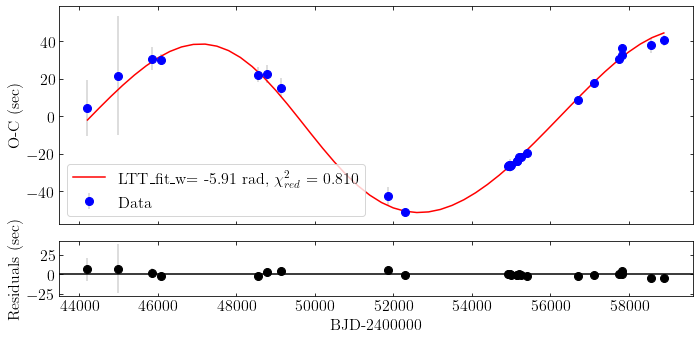

In [11]:
N_BMJD = 2400000
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
plt.xlabel('BJD-'+str(N_BMJD))

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
ax0.plot(x_line, y_line, '-', color='red',label='LTT\_fit\_w= -5.91 rad, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq)))

ax0.set_ylabel('O-C (sec)')
ax0.legend(loc="best")

Residual = y-ocfit

ax1.set_ylabel('Residuals (sec)')
ax1.errorbar(x, Residual, yerr= dy, fmt='o', markersize=8, color='black', ecolor='lightgray')
ax1.axhline(y=0, color='black', linestyle='-')
#ax1.legend(loc="best")
#plt.savefig("DP_Leo_LTT_fit_weighted_data_Thiswork_K_Res.jpg", dpi=1000)
plt.show()

#### The changing parameters: w = -1

In [12]:
m = 0
c = 0
K = 33.7        #m/s
e = 0               #No-unit
b = 0.0005
w = -1    #rad

In [13]:
def LTT_fit_w_m1(x,m,c,K,e,b):
    return m*x + c + K*(1 - e*e)*np.sin(b*x - w)/(1 + e*np.cos(b*x))

In [14]:
import scipy.optimize as optimization  
guess = (m,c,K,e,b)
#guess = [41.9455, 0.39, 0.0005, -1.36]
params_w_m1, params_covariance_w_m1 = optimization.curve_fit(LTT_fit_w_m1, x, y,sigma=dy, absolute_sigma=True,p0=guess)

In [15]:
m = params_w_m1[0]
c = params_w_m1[1]
K = params_w_m1[2]
e = params_w_m1[3]
b = params_w_m1[4]

dm = params_covariance_w_m1[0,0]
dc = params_covariance_w_m1[1,1]
dK = params_covariance_w_m1[2,2]
de = params_covariance_w_m1[3,3]
db = params_covariance_w_m1[4,4]

ocfit = LTT_fit_w_m1(x,*params_w_m1)

if e<0:
    w -= np.pi
    e *= -1
    w_deg = w*180/np.pi

In [16]:
print("The Keplerian parameters (w = -1 rad):")
print("m =", m, "+/-", dm**0.5, "[s]")
print("c =", c, "+/-", dc**0.5, "[s]")
print("K =", K, "+/-", dK**0.5, "[s]")
print("e =", e, "+/-", de**0.5, "[days]")
print("b =", b, "+/-", db**0.5, "[rad]")

#The period of the third body
P_d = 2*np.pi/b
dP_d = P_d*2*np.pi*db/(b**2)

#print("The orbital period of the third body (years):",P_d, '+/-', dP_d)
print("Pc =", P_d, "+/-", dP_d, "[days]")

P_yr = P_d/365.25
dP_yr = dP_d/365.25
#print("The orbital period of the third body (days):",P_yr, '+/-', dP_yr)
print("Pc_yr =", P_yr, "+/-", dP_yr, "[years]")

a_au = (P_yr**2)**(1./3)     # semi-major axis in au
da_au = np.sqrt((2*dP_d/(3*P_d))**2)*a_au
#print("Semi-major axis (AU):",a_au, '+/-', da_au)
print("Semi-major axis =", a_au, "+/-", da_au, "[AU]")

K_auyr = K*2.1096256684e-4      # K in au/yr

# compute planet mass and convert to Jupiter-mass units
mp = (2*np.pi)**(-1)*K_auyr*np.sqrt(1-e**2)*(P_yr)**(1/3)
mp_mjup = mp*1047.59421
dmp_mjup = mp_mjup * np.sqrt((dK/K)**2 + (dP_d/(3*P_d))**2 + (e*de/np.sqrt(1-e*e))**2 )

print ('Mass sin(i)Mp=', mp_mjup ,'+/-', dmp_mjup, "[MJ]")

The Keplerian parameters (w = -1 rad):
m = 0.0011000838903007662 +/- 0.0002508070150383637 [s]
c = -57.583193372344994 +/- 12.876107031506864 [s]
K = -47.212974266352155 +/- 0.9260007407249512 [s]
e = 0.17270269095686447 +/- 0.04305965116683962 [days]
b = 0.000483697016674608 +/- 8.002800120447365e-07 [rad]
Pc = 12989.919496250279 +/- 0.22342072172581134 [days]
Pc_yr = 35.56446131759145 +/- 0.0006116925988386348 [years]
Semi-major axis = 10.814609027107737 +/- 0.00012400424573923686 [AU]
Mass sin(i)Mp= -5.379106723048902 +/- -0.09771045948460678 [MJ]


In [17]:
x_min, x_max = np.amin(x), np.amax(x)
x_line_w_m1 = np.linspace(x_min, x_max)
y_line_w_m1 = LTT_fit_w_m1(x_line_w_m1, *params_w_m1) #### For all interporation 
#print(x_line)
print(ocfit)
#print(ocfit)
#print(x)

#Reduced_chisqrt
m = 5
dof = len_x - m
Chi_sqr = ((y - ocfit)**2/(dy)**2)/dof
Reduced_chisq_w_m1 = sum(Chi_sqr)
print("Reduced_chisq:",Reduced_chisq_w_m1)

[  6.50206142  19.26547986  29.16865467  31.01322207  23.00015918
  19.78460638  13.30471572 -45.77365725 -50.63414262 -27.74908777
 -27.29784745 -26.67954626 -26.07376694 -23.14553161 -22.62615705
 -21.5672992  -20.75843583 -17.5851375   11.23234192  18.86195768
  30.04702629  31.018543    31.018543    40.75700574  43.82532342]
Reduced_chisq: 0.8829129085244057


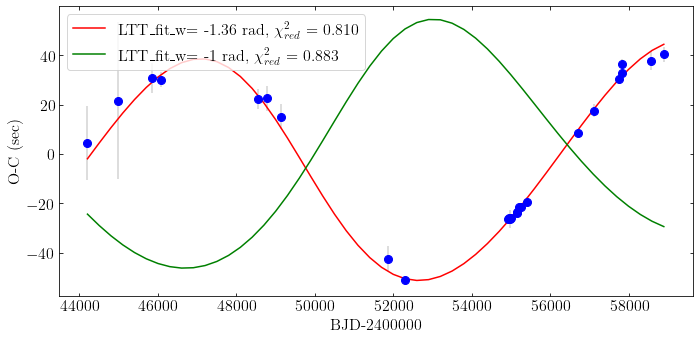

In [18]:
N_BMJD = 2400000
#print(phase)
#fig,ax = plt.subplots()
fig=plt.figure(figsize=(10, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
#plt.errorbar(x,y,dy,fmt='ok')
plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
plt.plot(x_line,y_line,'-r',label='LTT\_fit\_w= -1.36 rad, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq)))
plt.plot(x_line_w_m1,y_line_w_m1,'-g',label='LTT\_fit\_w= -1 rad, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq_w_m1)))
#plt.title('phased RV data for 51 Peg b')
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.legend(loc="best")
plt.show()

#### The changing parameters: w = -2 rad

In [19]:
m = 0
c = 0
K = 33.7        #m/s
e = 0               #No-unit
b = 0.0005
w = -2    #rad

In [20]:
def LTT_fit_w_m2(x,m,c,K,e,b):
    return m*x + c + K*(1 - e*e)*np.sin(b*x - w)/(1 + e*np.cos(b*x))

In [21]:
import scipy.optimize as optimization  
guess = (m,c,K,e,b)
#guess = [41.9455, 0.39, 0.0005, -1.36]
params_w_m2, params_covariance_w_m2 = optimization.curve_fit(LTT_fit_w_m2, x, y,sigma=dy, absolute_sigma=True,p0=guess)

In [22]:
m = params_w_m2[0]
c = params_w_m2[1]
K = params_w_m2[2]
e = params_w_m2[3]
b = params_w_m2[4]

dm = params_covariance_w_m2[0,0]
dc = params_covariance_w_m2[1,1]
dK = params_covariance_w_m2[2,2]
de = params_covariance_w_m2[3,3]
db = params_covariance_w_m2[4,4]

ocfit = LTT_fit_w_m2(x,*params_w_m2)

if e<0:
    w -= np.pi
    e *= -1
    w_deg = w*180/np.pi

In [23]:
print("The Keplerian parameters (w = -2 rad):")
print("m =", m, "+/-", dm**0.5, "[s]")
print("c =", c, "+/-", dc**0.5, "[s]")
print("K =", K, "+/-", dK**0.5, "[s]")
print("e =", e, "+/-", de**0.5, "[days]")
print("b =", b, "+/-", db**0.5, "[rad]")

#The period of the third body
P_d = 2*np.pi/b
dP_d = P_d*2*np.pi*db/(b**2)

#print("The orbital period of the third body (years):",P_d, '+/-', dP_d)
print("Pc =", P_d, "+/-", dP_d, "[days]")

P_yr = P_d/365.25
dP_yr = dP_d/365.25
#print("The orbital period of the third body (days):",P_yr, '+/-', dP_yr)
print("Pc_yr =", P_yr, "+/-", dP_yr, "[years]")

a_au = (P_yr**2)**(1./3)     # semi-major axis in au
da_au = np.sqrt((2*dP_d/(3*P_d))**2)*a_au
#print("Semi-major axis (AU):",a_au, '+/-', da_au)
print("Semi-major axis =", a_au, "+/-", da_au, "[AU]")

K_auyr = K*2.1096256684e-4      # K in au/yr

# compute planet mass and convert to Jupiter-mass units
mp = (2*np.pi)**(-1)*K_auyr*np.sqrt(1-e**2)*(P_yr)**(1/3)
mp_mjup = mp*1047.59421
dmp_mjup = mp_mjup * np.sqrt((dK/K)**2 + (dP_d/(3*P_d))**2 + (e*de/np.sqrt(1-e*e))**2 )

print ('Mass sin(i)Mp=', mp_mjup ,'+/-', dmp_mjup, "[MJ]")

The Keplerian parameters (w = -2 rad):
m = 0.0001485849288548947 +/- 0.00023247188080163282 [s]
c = -17.298181850225923 +/- 12.047863823166972 [s]
K = 44.918196096959115 +/- 0.7917994298488076 [s]
e = 0.09665909220857277 +/- 0.06925998240280641 [days]
b = 0.0005270807231280416 +/- 7.275347478679861e-07 [rad]
Pc = 11920.726809910742 +/- 0.14270389219999713 [days]
Pc_yr = 32.637171279700866 +/- 0.00039070196358657666 [years]
Semi-major axis = 10.212725847416142 +/- 8.150485853408073e-05 [AU]
Mass sin(i)Mp= 5.025432295863007 +/- 0.07018160059743979 [MJ]


In [24]:
x_min, x_max = np.amin(x), np.amax(x)
x_line_w_m2 = np.linspace(x_min, x_max)
y_line_w_m2 = LTT_fit_w_m2(x_line_w_m2, *params_w_m2) #### For all interporation 
#print(x_line)
print(ocfit)
#print(ocfit)
#print(x)

#Reduced_chisqrt
m = 5
dof = len_x - m
Chi_sqr = ((y - ocfit)**2/(dy)**2)/dof
Reduced_chisq_w_m2 = sum(Chi_sqr)
print("Reduced_chisq:",Reduced_chisq_w_m2)

[ -3.29828876  14.23072865  29.99628643  33.13297285  20.5091381
  15.94478155   7.36627691 -46.41861822 -49.3088894  -27.82920277
 -27.41753084 -26.85168048 -26.29529826 -23.57774662 -23.09083791
 -22.09356024 -21.32756097 -18.28738158  11.6063501   19.88379014
  31.41634292  32.33254184  32.33254184  39.54936916  40.27833002]
Reduced_chisq: 1.069509713321324


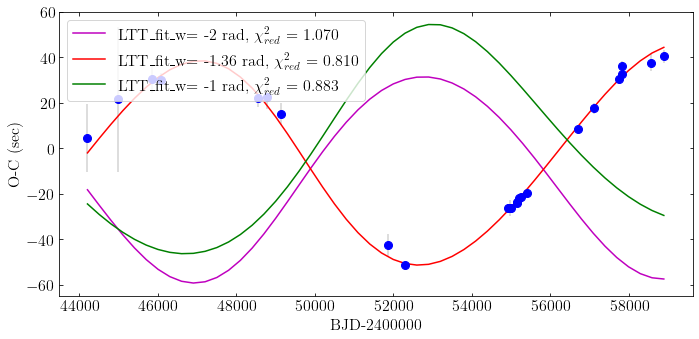

In [25]:
N_BMJD = 2400000
#print(phase)
#fig,ax = plt.subplots()
fig=plt.figure(figsize=(10, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
#plt.errorbar(x,y,dy,fmt='ok')
plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
plt.plot(x_line_w_m2,y_line_w_m2,'-m',label='LTT\_fit\_w= -2 rad, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq_w_m2)))
plt.plot(x_line,y_line,'-r',label='LTT\_fit\_w= -1.36 rad, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq)))
plt.plot(x_line_w_m1,y_line_w_m1,'-g',label='LTT\_fit\_w= -1 rad, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq_w_m1)))
#plt.title('phased RV data for 51 Peg b')
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.legend(loc="best")
plt.show()

#### The changing parameters: w = -1.30

In [26]:
m = 0
c = 0
K = 33.7        #m/s
e = 0               #No-unit
b = 0.0005
w = -1.30    #rad

In [27]:
def LTT_fit_w_m1p3(x,m,c,K,e,b):
    return m*x + c + K*(1 - e*e)*np.sin(b*x - w)/(1 + e*np.cos(b*x))

In [28]:
import scipy.optimize as optimization  
guess = (m,c,K,e,b)
#guess = [41.9455, 0.39, 0.0005, -1.36]
params_w_m1p3, params_covariance_w_m1p3 = optimization.curve_fit(LTT_fit_w_m1p3, x, y,sigma=dy, absolute_sigma=True,p0=guess)

In [29]:
m = params_w_m1p3[0]
c = params_w_m1p3[1]
K = params_w_m1p3[2]
e = params_w_m1p3[3]
b = params_w_m1p3[4]

dm = params_covariance_w_m1p3[0,0]
dc = params_covariance_w_m1p3[1,1]
dK = params_covariance_w_m1p3[2,2]
de = params_covariance_w_m1p3[3,3]
db = params_covariance_w_m1p3[4,4]

ocfit = LTT_fit_w_m1p3(x,*params_w_m1p3)

if e<0:
    w -= np.pi
    e *= -1
    w_deg = w*180/np.pi

In [30]:
print("The Keplerian parameters (w = -1.3 rad):")
print("m =", m, "+/-", dm**0.5, "[s]")
print("c =", c, "+/-", dc**0.5, "[s]")
print("K =", K, "+/-", dK**0.5, "[s]")
print("e =", e, "+/-", de**0.5, "[days]")
print("b =", b, "+/-", db**0.5, "[rad]")

#The period of the third body
P_d = 2*np.pi/b
dP_d = P_d*2*np.pi*db/(b**2)

#print("The orbital period of the third body (years):",P_d, '+/-', dP_d)
print("Pc =", P_d, "+/-", dP_d, "[days]")

P_yr = P_d/365.25
dP_yr = dP_d/365.25
#print("The orbital period of the third body (days):",P_yr, '+/-', dP_yr)
print("Pc_yr =", P_yr, "+/-", dP_yr, "[years]")

a_au = (P_yr**2)**(1./3)     # semi-major axis in au
da_au = np.sqrt((2*dP_d/(3*P_d))**2)*a_au
#print("Semi-major axis (AU):",a_au, '+/-', da_au)
print("Semi-major axis =", a_au, "+/-", da_au, "[AU]")

K_auyr = K*2.1096256684e-4      # K in au/yr

# compute planet mass and convert to Jupiter-mass units
mp = (2*np.pi)**(-1)*K_auyr*np.sqrt(1-e**2)*(P_yr)**(1/3)
mp_mjup = mp*1047.59421
dmp_mjup = mp_mjup * np.sqrt((dK/K)**2 + (dP_d/(3*P_d))**2 + (e*de/np.sqrt(1-e*e))**2 )

print ('Mass sin(i)Mp=', mp_mjup ,'+/-', dmp_mjup, "[MJ]")

The Keplerian parameters (w = -1.3 rad):
m = 6.837738090642616e-05 +/- 0.0002307330954937558 [s]
c = -10.252518182439516 +/- 11.901052264997432 [s]
K = 44.878955608527406 +/- 0.8264343341288303 [s]
e = 0.029849493803235275 +/- 0.04932002260149219 [days]
b = 0.0005392435495302485 +/- 7.521196051760452e-07 [rad]
Pc = 11651.85065756106 +/- 0.14242252440493983 [days]
Pc_yr = 31.901028494349244 +/- 0.0003899316205474054 [years]
Semi-major axis = 10.058574957518834 +/- 8.196509890535589e-05 [AU]
Mass sin(i)Mp= 5.004215795843827 +/- 0.0761578988434258 [MJ]


In [31]:
x_min, x_max = np.amin(x), np.amax(x)
x_line_w_m1p3 = np.linspace(x_min, x_max)
y_line_w_m1p3 = LTT_fit_w_m1p3(x_line_w_m1p3, *params_w_m1p3) #### For all interporation 
#print(x_line)
print(ocfit)
#print(ocfit)
#print(x)

#Reduced_chisqrt
m = 5
dof = len_x - m
Chi_sqr = ((y - ocfit)**2/(dy)**2)/dof
Reduced_chisq_w_m1p3 = sum(Chi_sqr)
print("Reduced_chisq:",Reduced_chisq_w_m1p3)

[ -6.79764788  11.1507409   26.860446    30.02648104  24.40502703
  20.72372494  13.4468817  -45.45979863 -50.07472738 -28.17305635
 -27.70297417 -27.05772585 -26.42430893 -23.34627489 -22.7977049
 -21.67706096 -20.8190418  -17.43815034  13.36270817  21.01887867
  30.93886538  31.68147863  31.68147863  37.05427278  37.2885455 ]
Reduced_chisq: 1.2951115678803369


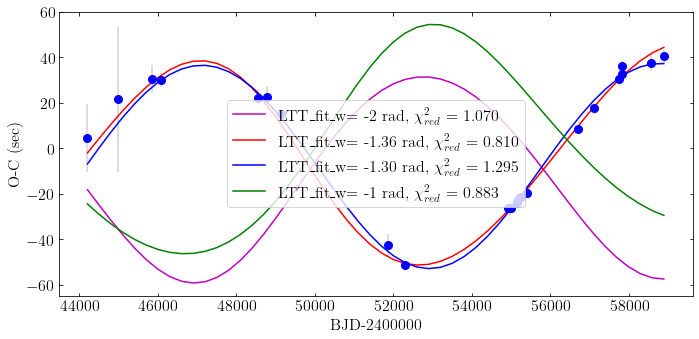

In [32]:
N_BMJD = 2400000
#print(phase)
#fig,ax = plt.subplots()
fig=plt.figure(figsize=(10, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
#plt.errorbar(x,y,dy,fmt='ok')
plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
plt.plot(x_line_w_m2,y_line_w_m2,'-m',label='LTT\_fit\_w= -2 rad, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq_w_m2)))
plt.plot(x_line,y_line,'-r',label='LTT\_fit\_w= -1.36 rad, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq)))
plt.plot(x_line_w_m1p3,y_line_w_m1p3,'-b',label='LTT\_fit\_w= -1.30 rad, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq_w_m1p3)))
plt.plot(x_line_w_m1,y_line_w_m1,'-g',label='LTT\_fit\_w= -1 rad, $\chi_{red}^{2}$ = '+str('%0.3f' %(Reduced_chisq_w_m1)))
#plt.title('phased RV data for 51 Peg b')
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.legend(loc="best")
plt.savefig("DP_Leo_LTT_fit_weighted_data_Thiswork_w_Res.jpg", dpi=1000)
plt.show()